In [1]:
# Import libraries
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
import quandl

# Define companies and API keys (if needed)
companies = ['AAPL', 'MSFT', 'GOOG', 'AMZN']
yf.pdr_override()  # optional for pandas datareader


In [2]:
# Download data from Yahoo Finance
def download_data_yf(symbol):
    try:
        data = yf.download(symbol, period="max")
        data.dropna(inplace=True)
        return data
    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")
        return None



# Download data for each company
data = {}
for company in companies:
    # data[company] = download_data_quandl(company)
    data[company] = download_data_yf(company)
    



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Calculate summary statistics
for company, df in data.items():
    print(f"\n**Statistics for {company}**")
    print(df.describe())



**Statistics for AAPL**
               Open          High           Low         Close     Adj Close  \
count  10839.000000  10839.000000  10839.000000  10839.000000  10839.000000   
mean      19.831942     20.050536     19.622363     19.845539     19.093952   
std       41.492530     41.957096     41.062091     41.531017     41.127324   
min        0.049665      0.049665      0.049107      0.049107      0.038000   
25%        0.294643      0.301339      0.287723      0.294643      0.241227   
50%        0.508929      0.516741      0.500000      0.508929      0.417317   
75%       18.826429     18.995000     18.648214     18.816964     16.397508   
max      196.240005    198.229996    195.279999    196.449997    195.926956   

             Volume  
count  1.083900e+04  
mean   3.218245e+08  
std    3.364490e+08  
min    0.000000e+00  
25%    1.163904e+08  
50%    2.093728e+08  
75%    4.017018e+08  
max    7.421641e+09  

**Statistics for MSFT**
              Open         High         

In [4]:
data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700


In [5]:

# Access data for APPL
data_appl = data["AAPL"]

# Descriptive statistics for numerical columns
print(data_appl[["Open", "High", "Low", "Close", "Adj Close"]].describe())

# Volume analysis
print(data_appl["Volume"].describe())
print(data_appl["Volume"].value_counts())

# Daily price change calculation and correlation with volume
data_appl["Daily Change"] = data_appl["Close"].pct_change()
print(data_appl["Daily Change"].corr(data_appl["Volume"]))


               Open          High           Low         Close     Adj Close
count  10839.000000  10839.000000  10839.000000  10839.000000  10839.000000
mean      19.831942     20.050536     19.622363     19.845539     19.093952
std       41.492530     41.957096     41.062091     41.531017     41.127324
min        0.049665      0.049665      0.049107      0.049107      0.038000
25%        0.294643      0.301339      0.287723      0.294643      0.241227
50%        0.508929      0.516741      0.500000      0.508929      0.417317
75%       18.826429     18.995000     18.648214     18.816964     16.397508
max      196.240005    198.229996    195.279999    196.449997    195.926956
count    1.083900e+04
mean     3.218245e+08
std      3.364490e+08
min      0.000000e+00
25%      1.163904e+08
50%      2.093728e+08
75%      4.017018e+08
max      7.421641e+09
Name: Volume, dtype: float64
Volume
246400000    7
239680000    6
244160000    6
255360000    5
302400000    5
            ..
475249600    1

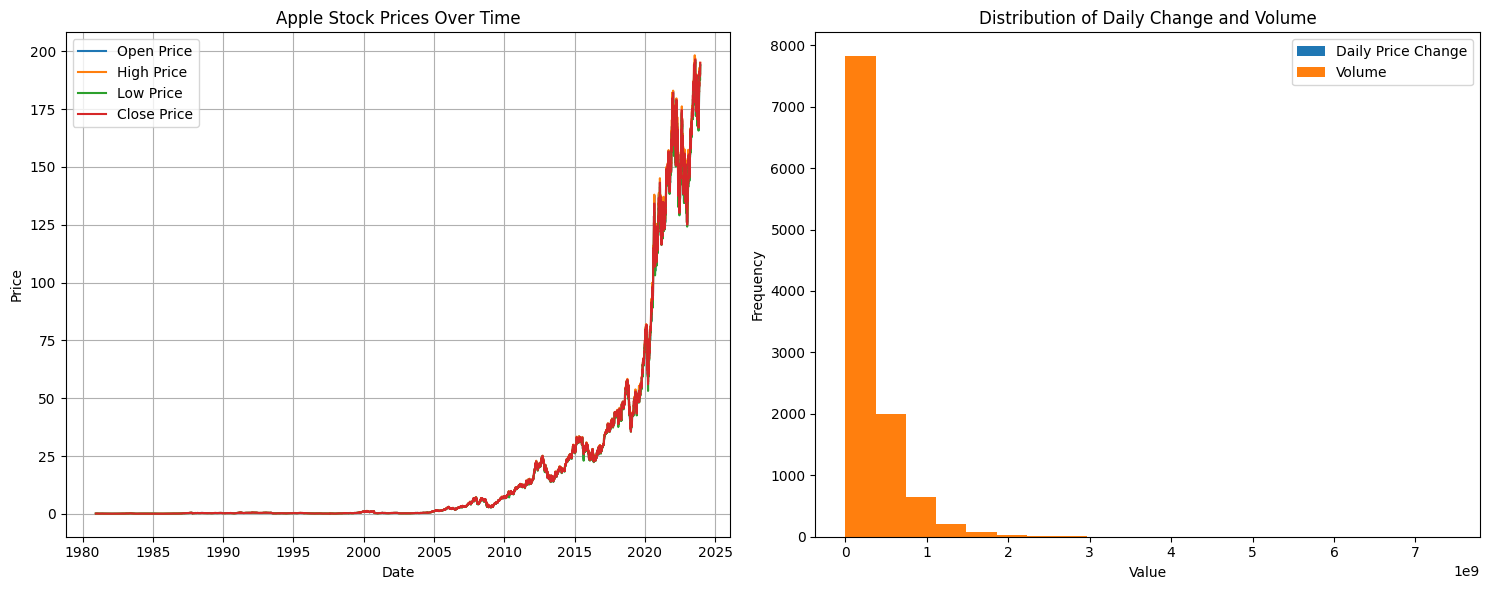

In [6]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Side-by-side time series plot for Open, High, Low, Close
axs[0].plot(data_appl["Open"], label="Open Price")
axs[0].plot(data_appl["High"], label="High Price")
axs[0].plot(data_appl["Low"], label="Low Price")
axs[0].plot(data_appl["Close"], label="Close Price")
axs[0].set_title("Apple Stock Prices Over Time")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")
axs[0].grid(True)
axs[0].legend()

# Side-by-side distribution plot for Daily Price Change and Volume
axs[1].hist(data_appl["Daily Change"], bins=20, label="Daily Price Change")
axs[1].hist(data_appl["Volume"], bins=20, label="Volume")
axs[1].set_title("Distribution of Daily Change and Volume")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Frequency")
axs[1].legend()

plt.tight_layout()
plt.show()




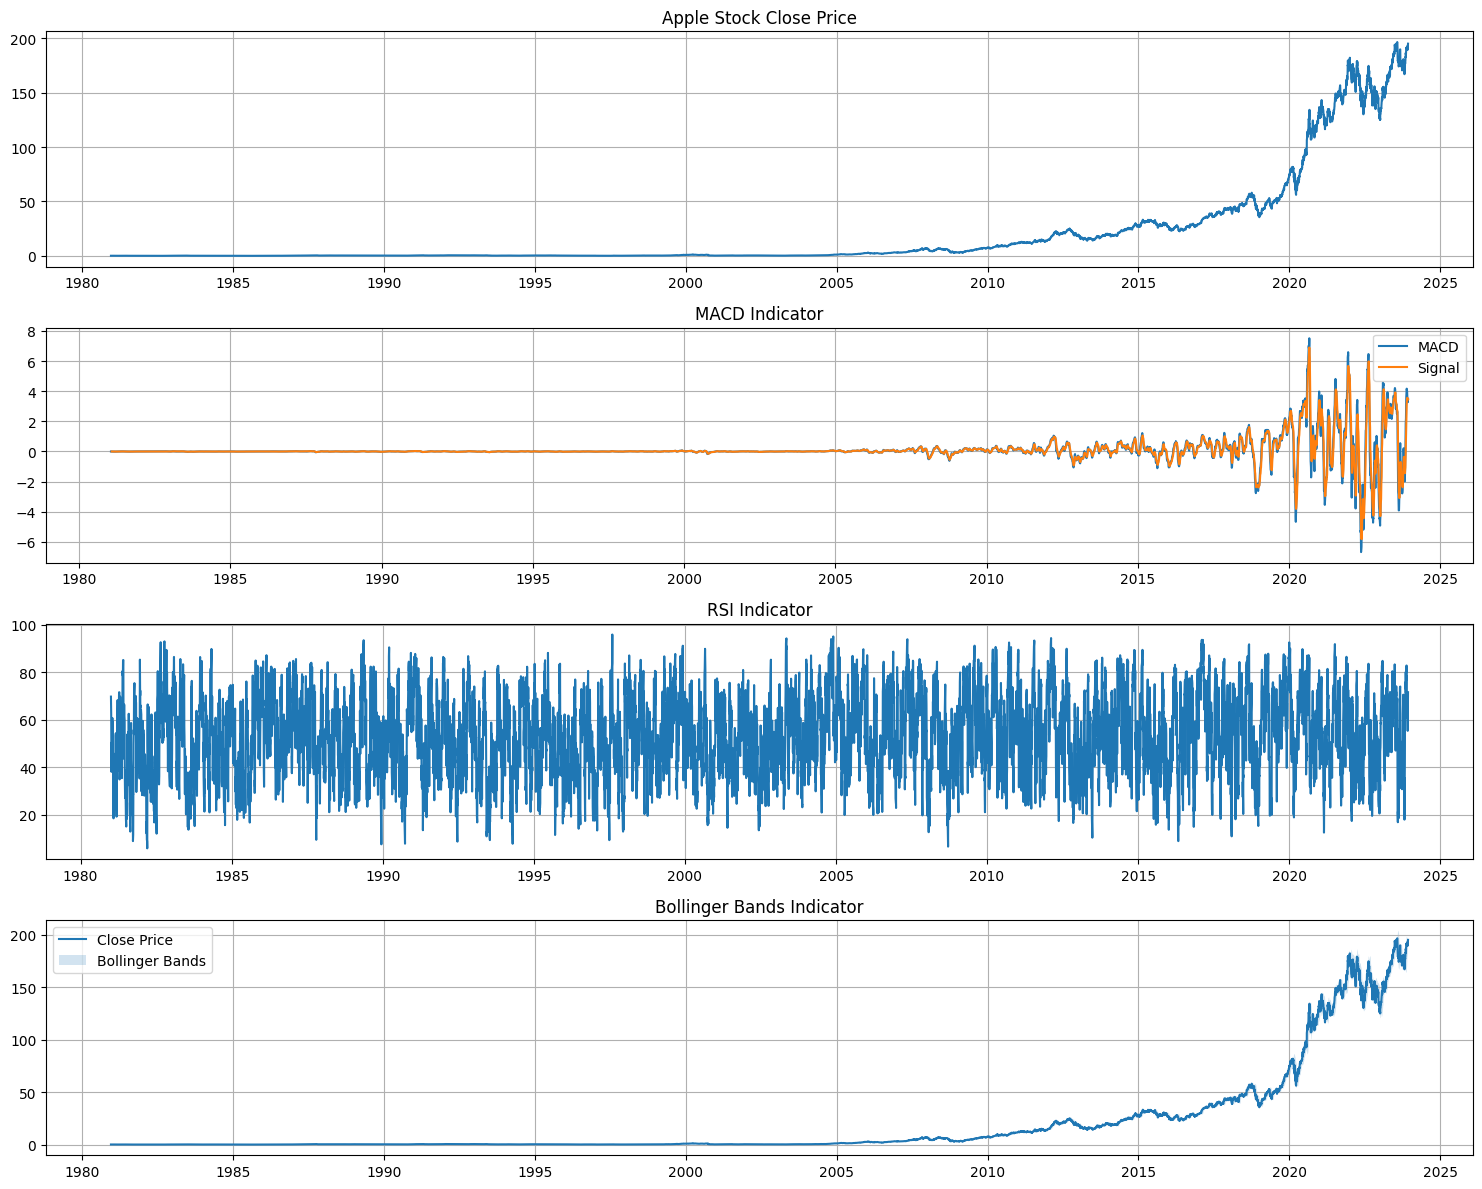

In [7]:

# Moving Average Convergence Divergence (MACD)
def MACD(data, fast_period=12, slow_period=26, signal_period=9):
    ema_fast = data["Close"].ewm(span=fast_period, min_periods=fast_period - 1).mean()
    ema_slow = data["Close"].ewm(span=slow_period, min_periods=slow_period - 1).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_period, min_periods=signal_period - 1).mean()
    return macd, signal

# Relative Strength Index (RSI)
def RSI(data, period=14):
    delta = data["Close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    ema_up = up.ewm(span=period, min_periods=period - 1).mean()
    ema_down = down.abs().ewm(span=period, min_periods=period - 1).mean()
    rs = ema_up / ema_down
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Bollinger Bands
def BollingerBands(data, period=20, std_multiplier=2):
    ma = data["Close"].rolling(window=period).mean()
    std = data["Close"].rolling(window=period).std()
    upper_band = ma + std_multiplier * std
    lower_band = ma - std_multiplier * std
    return upper_band, lower_band, ma

# Calculate indicators
macd, signal = MACD(data_appl)
rsi = RSI(data_appl)
upper_band, lower_band, ma = BollingerBands(data_appl)

# Plot indicators with closing price
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

axs[0].plot(data_appl["Close"])
axs[0].set_title("Apple Stock Close Price")
axs[0].grid(True)

axs[1].plot(macd, label="MACD")
axs[1].plot(signal, label="Signal")
axs[1].legend()
axs[1].set_title("MACD Indicator")
axs[1].grid(True)

axs[2].plot(rsi)
axs[2].set_title("RSI Indicator")
axs[2].grid(True)

axs[3].plot(data_appl["Close"], label="Close Price")
axs[3].fill_between(data_appl.index, upper_band, lower_band, alpha=0.2, label="Bollinger Bands")
axs[3].legend()
axs[3].set_title("Bollinger Bands Indicator")
axs[3].grid(True)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Calculate correlations
correlation_matrix = data_appl.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Analyze correlation between Daily Change and Volume
print("Correlation between Daily Change and Volume:", data_appl["Daily Change"].corr(data_appl["Volume"]))

# Perform linear regression
features = ["Open", "High", "Low", "Volume"]
target = "Close"

model = LinearRegression()
model.fit(data_appl[features], data_appl[target])

# Print regression coefficients
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate model performance
predictions = model.predict(data_appl[features])
mse = mean_squared_error(data_appl[target], predictions)
r2 = r2_score(data_appl[target], predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Correlation Matrix:
                   Open      High       Low     Close  Adj Close    Volume  \
Open          1.000000  0.999946  0.999935  0.999866   0.999629 -0.239820   
High          0.999946  1.000000  0.999921  0.999935   0.999706 -0.239407   
Low           0.999935  0.999921  1.000000  0.999938   0.999706 -0.240492   
Close         0.999866  0.999935  0.999938  1.000000   0.999770 -0.239964   
Adj Close     0.999629  0.999706  0.999706  0.999770   1.000000 -0.241876   
Volume       -0.239820 -0.239407 -0.240492 -0.239964  -0.241876  1.000000   
Daily Change -0.000629  0.000920  0.001248  0.003167   0.003061  0.000703   

              Daily Change  
Open             -0.000629  
High              0.000920  
Low               0.001248  
Close             0.003167  
Adj Close         0.003061  
Volume            0.000703  
Daily Change      1.000000  
Correlation between Daily Change and Volume: 0.0007032854010666005
Regression Coefficients: [-6.57575971e-01  8.48368685e-01  8.09

In [10]:
data['MSFT']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...
2023-12-04,369.100006,369.519989,362.899994,369.140015,369.140015,32063300
2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000
2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100


In [11]:
# Access data for APPL
data_msft = data["MSFT"]

# Descriptive statistics for numerical columns
print(data_msft[["Open", "High", "Low", "Close", "Adj Close"]].describe())

# Volume analysis
print(data_msft["Volume"].describe())
print(data_msft["Volume"].value_counts())

# Daily price change calculation and correlation with volume
data_msft["Daily Change"] = data_msft["Close"].pct_change()
print(data_msft["Daily Change"].corr(data_msft["Volume"]))

              Open         High          Low        Close    Adj Close
count  9513.000000  9513.000000  9513.000000  9513.000000  9513.000000
mean     52.451563    53.011710    51.882511    52.466505    46.952070
std      78.065719    78.857753    77.247030    78.091866    78.086193
min       0.088542     0.092014     0.088542     0.090278     0.055969
25%       5.515625     5.609375     5.437500     5.515625     3.419489
50%      27.190001    27.459999    26.959999    27.209999    19.086761
75%      45.310001    45.930000    44.781250    45.330002    35.725422
max     383.760010   384.299988   378.160004   382.700012   382.700012
count    9.513000e+03
mean     5.737073e+07
std      3.816450e+07
min      2.304000e+06
25%      3.303420e+07
50%      5.053890e+07
75%      7.125840e+07
max      1.031789e+09
Name: Volume, dtype: float64
Volume
18316800    4
3427200     3
12672000    3
69436800    3
54547200    3
           ..
41548000    1
56702200    1
52022800    1
50791600    1
5767570  

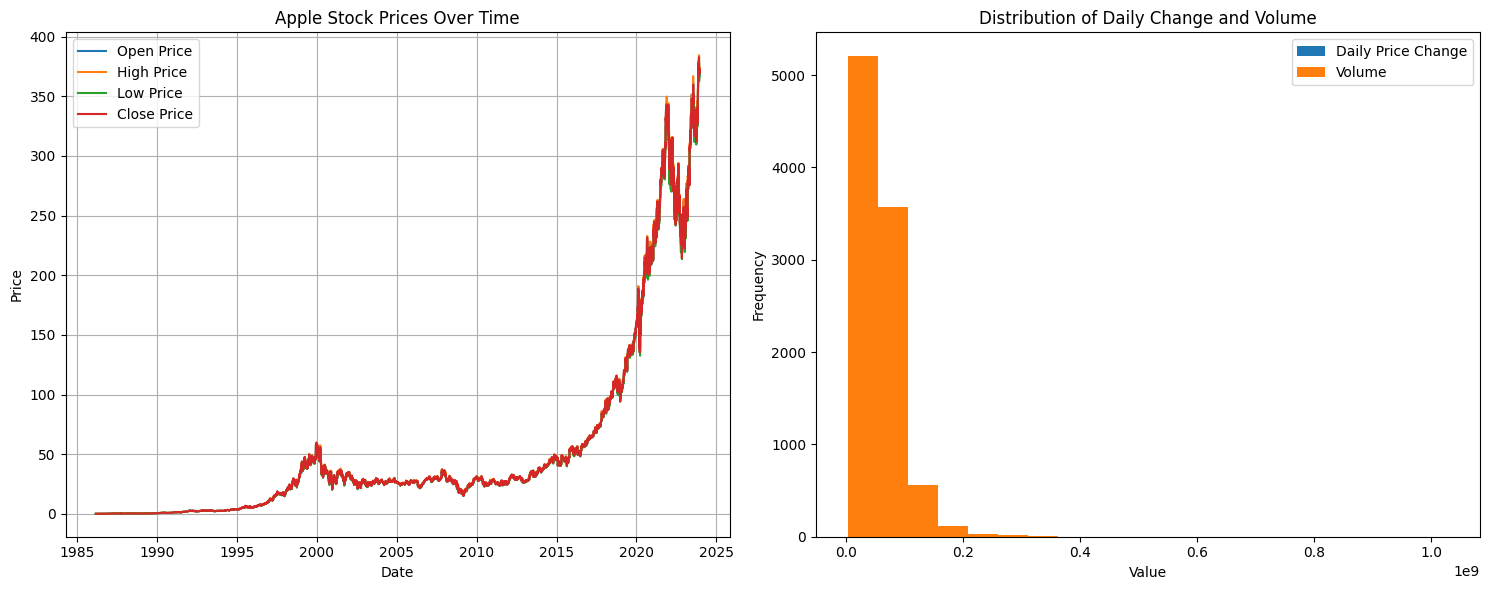

In [12]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Side-by-side time series plot for Open, High, Low, Close
axs[0].plot(data_msft["Open"], label="Open Price")
axs[0].plot(data_msft["High"], label="High Price")
axs[0].plot(data_msft["Low"], label="Low Price")
axs[0].plot(data_msft["Close"], label="Close Price")
axs[0].set_title("Apple Stock Prices Over Time")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Price")
axs[0].grid(True)
axs[0].legend()

# Side-by-side distribution plot for Daily Price Change and Volume
axs[1].hist(data_msft["Daily Change"], bins=20, label="Daily Price Change")
axs[1].hist(data_msft["Volume"], bins=20, label="Volume")
axs[1].set_title("Distribution of Daily Change and Volume")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Frequency")
axs[1].legend()

plt.tight_layout()
plt.show()




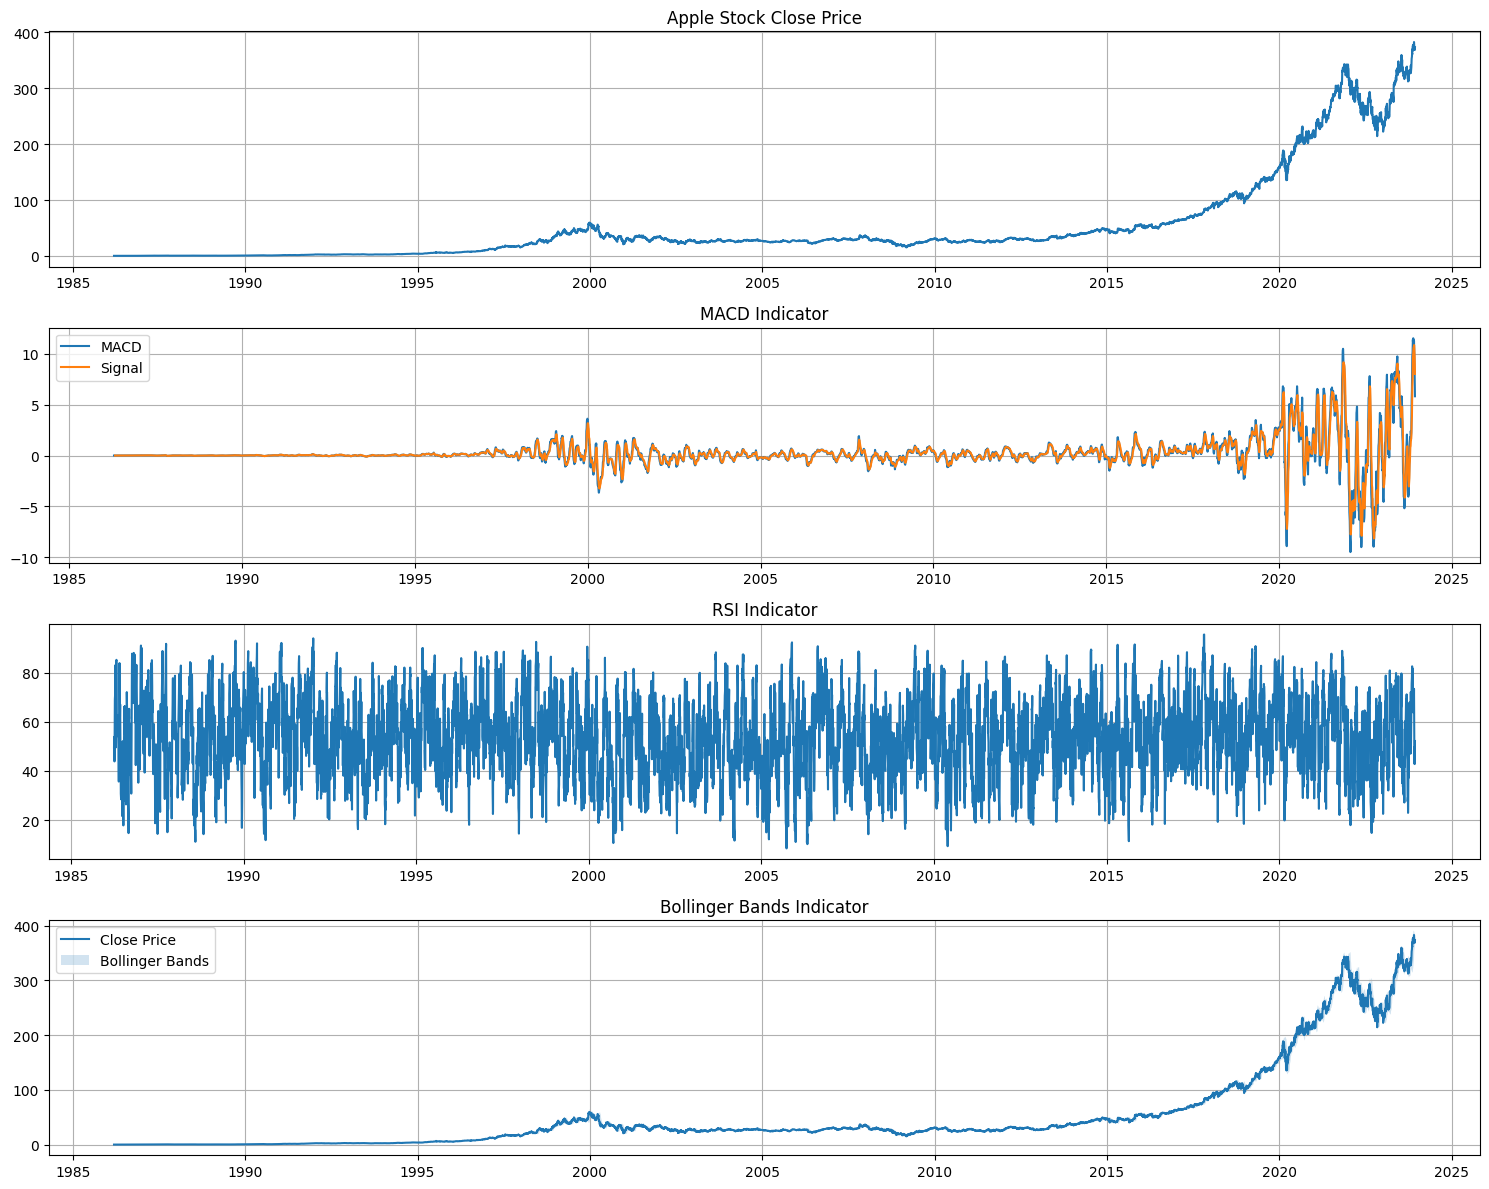

In [13]:

# Moving Average Convergence Divergence (MACD)
def MACD(data, fast_period=12, slow_period=26, signal_period=9):
    ema_fast = data["Close"].ewm(span=fast_period, min_periods=fast_period - 1).mean()
    ema_slow = data["Close"].ewm(span=slow_period, min_periods=slow_period - 1).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_period, min_periods=signal_period - 1).mean()
    return macd, signal

# Relative Strength Index (RSI)
def RSI(data, period=14):
    delta = data["Close"].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    ema_up = up.ewm(span=period, min_periods=period - 1).mean()
    ema_down = down.abs().ewm(span=period, min_periods=period - 1).mean()
    rs = ema_up / ema_down
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Bollinger Bands
def BollingerBands(data, period=20, std_multiplier=2):
    ma = data["Close"].rolling(window=period).mean()
    std = data["Close"].rolling(window=period).std()
    upper_band = ma + std_multiplier * std
    lower_band = ma - std_multiplier * std
    return upper_band, lower_band, ma

# Calculate indicators
macd, signal = MACD(data_msft)
rsi = RSI(data_msft)
upper_band, lower_band, ma = BollingerBands(data_msft)

# Plot indicators with closing price
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

axs[0].plot(data_msft["Close"])
axs[0].set_title("Apple Stock Close Price")
axs[0].grid(True)

axs[1].plot(macd, label="MACD")
axs[1].plot(signal, label="Signal")
axs[1].legend()
axs[1].set_title("MACD Indicator")
axs[1].grid(True)

axs[2].plot(rsi)
axs[2].set_title("RSI Indicator")
axs[2].grid(True)

axs[3].plot(data_msft["Close"], label="Close Price")
axs[3].fill_between(data_msft.index, upper_band, lower_band, alpha=0.2, label="Bollinger Bands")
axs[3].legend()
axs[3].set_title("Bollinger Bands Indicator")
axs[3].grid(True)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Calculate correlations
correlation_matrix = data_appl.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Analyze correlation between Daily Change and Volume
print("Correlation between Daily Change and Volume:", data_msft["Daily Change"].corr(data_msft["Volume"]))

# Perform linear regression
features = ["Open", "High", "Low", "Volume"]
target = "Close"

model = LinearRegression()
model.fit(data_msft[features], data_msft[target])

# Print regression coefficients
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate model performance
predictions = model.predict(data_msft[features])
mse = mean_squared_error(data_msft[target], predictions)
r2 = r2_score(data_msft[target], predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Correlation Matrix:
                   Open      High       Low     Close  Adj Close    Volume  \
Open          1.000000  0.999946  0.999935  0.999866   0.999629 -0.239820   
High          0.999946  1.000000  0.999921  0.999935   0.999706 -0.239407   
Low           0.999935  0.999921  1.000000  0.999938   0.999706 -0.240492   
Close         0.999866  0.999935  0.999938  1.000000   0.999770 -0.239964   
Adj Close     0.999629  0.999706  0.999706  0.999770   1.000000 -0.241876   
Volume       -0.239820 -0.239407 -0.240492 -0.239964  -0.241876  1.000000   
Daily Change -0.000629  0.000920  0.001248  0.003167   0.003061  0.000703   

              Daily Change  
Open             -0.000629  
High              0.000920  
Low               0.001248  
Close             0.003167  
Adj Close         0.003061  
Volume            0.000703  
Daily Change      1.000000  
Correlation between Daily Change and Volume: -0.005642877422099097
Regression Coefficients: [-6.60403380e-01  8.15744732e-01  8.45